# Conceptual

**1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a fexible statistical learning method to be better or worse than an infexible method. Justify your answer.**

**(a) The sample size n is extremely large, and the number of predictors p is small.**

* Generally, for a large sample size and a small number of predictors, flexible statistical learning methods are expected to perform better than inflexible methods.
    
* Justification: With a large sample size, flexible methods can capture more complex relationships in the data and fit the model more accurately without overfitting. Additionally, when the number of predictors is small, there is less risk of overfitting, making it safe to use more flexible models.

**(b) The number of predictors p is extremely large, and the number of observations n is small.**

* In this case, the performance of a flexible statistical learning method is expected to be worse than an inflexible method.

* Justification: When the number of predictors is much larger than the number of observations, flexible methods can suffer from overfitting. They may struggle to generalize well from a small amount of data, leading to poor predictive performance. Inflexible methods, on the other hand, are less likely to overfit and may provide more stable predictions.

**(c) The relationship between the predictors and response is highly non-linear.**

* For a highly non-linear relationship, flexible statistical learning methods are generally expected to perform better than inflexible methods.

* Justification: Flexible methods, such as decision trees or nonlinear regression models, can capture complex, non-linear relationships in the data. They can adapt to the curvature and interactions in the data, resulting in better predictive performance compared to linear or inflexible models.

**(d) The variance of the error terms, i.e. σ2 = Var("), is extremely high.**

* In the presence of high error variance, the performance of a flexible statistical learning method may be worse than an inflexible method.

* Justification: When error variance is high, it becomes challenging to distinguish true signal from noise. Flexible models may fit the noise in the data, leading to overfitting and poor out-of-sample performance. In contrast, inflexible models may provide more stable and robust predictions by not overly reacting to noisy data points.

**2. Explain whether each scenario is a classifcation or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.**

**(a) We collect a set of data on the top 500 firms in the US. For each firm we record proft, number of employees, industry and the CEO salary. We are interested in understanding which factors afect CEO salary.**

* Type: Regression

* Objective: Inference

* Explanation: In this scenario, the goal is to understand the relationship between CEO salary (a continuous variable) and the factors such as profit, number of employees, and industry. The main interest is in inferring how these factors affect CEO salary.

* n: The number of observations (firms) in the dataset [500]
* p: The number of predictors (features), which includes profit, number of employees, and industry. [3]

**(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.**

* Type: Classification

* Objective: Prediction

* Explanation: The objective is to predict whether a new product will be a success or a failure based on the given features (price, marketing budget, competition price, etc.). This is a binary classification problem where the outcome is categorical (success or failure).

* n: The number of observations (data on 20 similar products) [20]
* p: The number of predictors (features), including price, marketing budget, competition price, and ten other variables. [13]

**(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.**

* Type: Regression

* Objective: Prediction

* Explanation: The goal is to predict the percentage change in the USD/Euro exchange rate, which is a continuous variable, based on the weekly changes in world stock markets (percentage changes in the US market, British market, and German market). This is a regression problem as it involves predicting a continuous target variable.

* n: The number of observations (weekly data for all of 2012) [52]
* p: The number of predictors (features), including the percentage changes in the US market, British market, and German market. [3]

**3. We now revisit the bias-variance decomposition.**

**(a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less fexible statistical learning methods towards more fexible approaches. The x-axis should represent the amount of fexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.**

* Squared Bias Curve: Initially high and slowly decreasing as flexibility increases.

* Variance Curve: Initially low and steadily increasing as flexibility increases.

* Training Error Curve: Decreases continuously and approaches zero with high flexibility.

* Test Error Curve: Initially decreases and then increases after a certain point.
    
* Bayes (Irreducible) Error Curve: A horizontal line at a constant value, representing the inherent noise in the data.


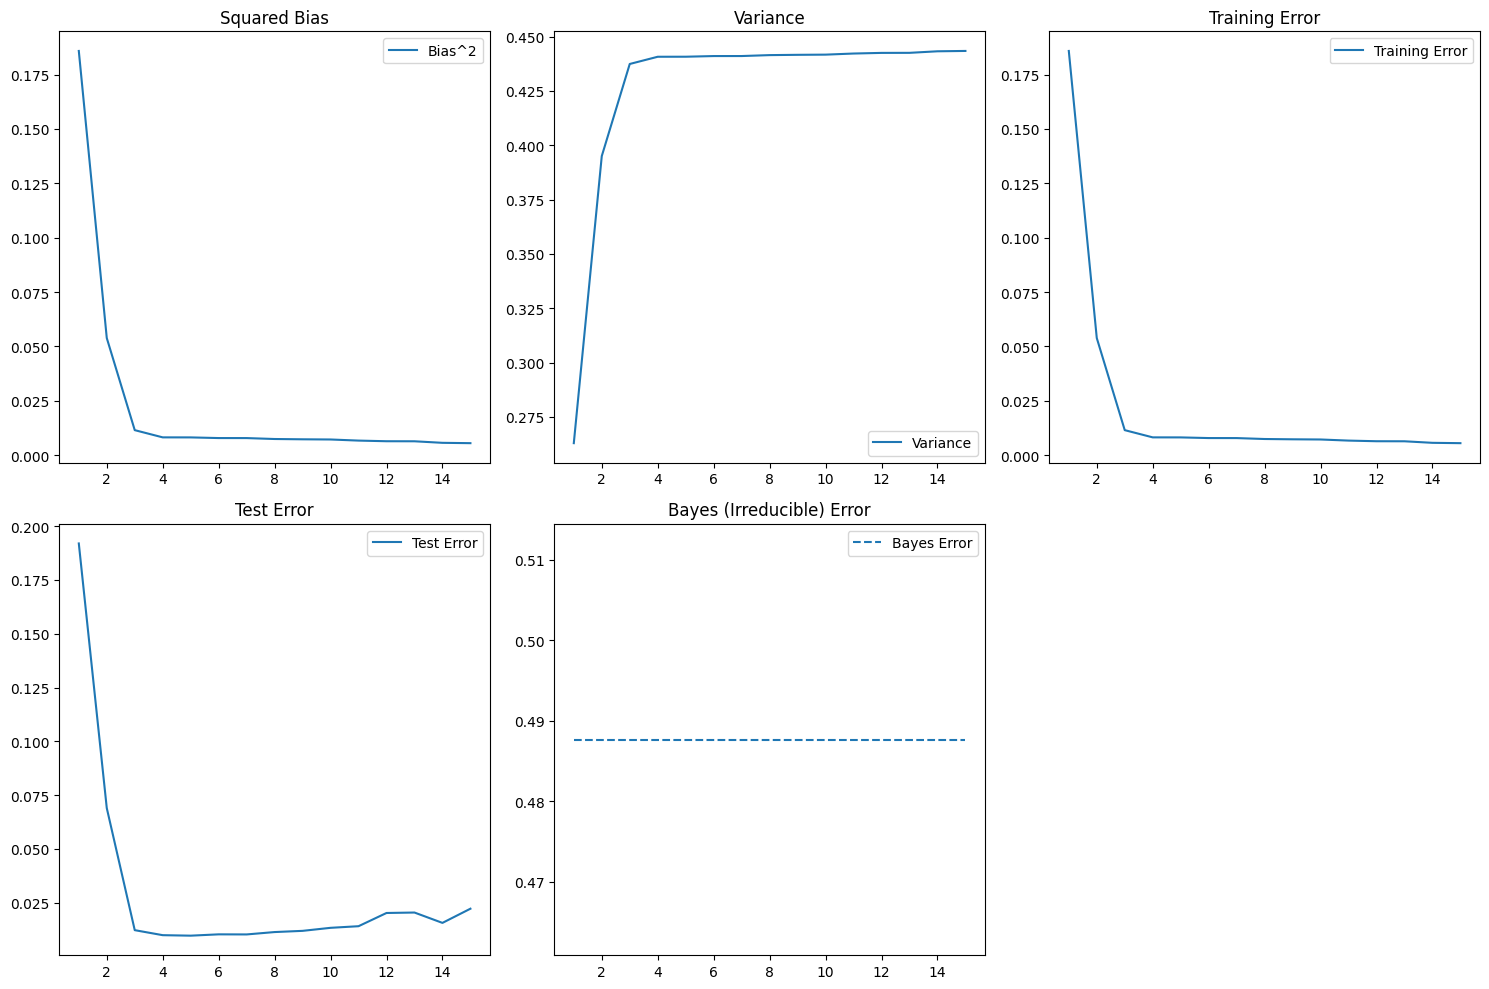

In [3]:
# Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Define the maximum polynomial degree for flexibility
max_degree = 15

# Initialize arrays to store results
degrees = np.arange(1, max_degree + 1)
train_error = np.zeros(max_degree)
test_error = np.zeros(max_degree)
bias_squared = np.zeros(max_degree)
variance = np.zeros(max_degree)

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions on training and test data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate squared bias
    bias_squared[degree - 1] = np.mean((y_train - y_train_pred) ** 2)
    
    # Calculate variance
    variance[degree - 1] = np.mean((y_train_pred - np.mean(y_train_pred)) ** 2)
    
    # Calculate training and test error
    train_error[degree - 1] = mean_squared_error(y_train, y_train_pred)
    test_error[degree - 1] = mean_squared_error(y_test, y_test_pred)

# Create subplots for the curves
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(degrees, bias_squared, label='Bias^2')
plt.title('Squared Bias')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(degrees, variance, label='Variance')
plt.title('Variance')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(degrees, train_error, label='Training Error')
plt.title('Training Error')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(degrees, test_error, label='Test Error')
plt.title('Test Error')
plt.legend()

# Generate constant Bayes (irreducible) error
bayes_error = np.var(y_test)
bayes_error_line = np.full_like(test_error, bayes_error)

plt.subplot(2, 3, 5)
plt.plot(degrees, bayes_error_line, label='Bayes Error', linestyle='--')
plt.title('Bayes (Irreducible) Error')
plt.legend()

plt.tight_layout()
plt.show()


**(b) Explain why each of the fve curves has the shape displayed in part (a).**

* **Squared Bias Curve:** Initially high because less flexible models cannot capture complex relationships and tend to underfit the data. As flexibility increases, the model can fit the data better, reducing bias.

* **Variance Curve:** Initially low because less flexible models are less sensitive to variations in the training data. As flexibility increases, the model becomes more complex and can fit noise in the data, leading to higher variance.

* **Training Error Curve:** Decreases continuously because the model becomes more capable of fitting the training data as flexibility increases. With very flexible models, it can fit the training data almost perfectly.

* **Test Error Curve:** Often U-shaped because it combines the effects of bias and variance. Initially, as flexibility increases, bias decreases, and the model fits the training data better, reducing training error. However, after a point, the model starts overfitting and fitting noise in the data, causing test error to increase.

* **Bayes (Irreducible) Error Curve:** A horizontal line because it represents the inherent noise in the data, which remains constant regardless of model flexibility. This error cannot be reduced no matter how flexible the model is.

**4. You will now think of some real-life applications for statistical learning.**

**(a) Describe three real-life applications in which classifcation might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.**

1. Email Spam Detection:

* Response: Binary classification (Spam or Not Spam).
* Predictors: Features extracted from email content, sender information, subject lines, and metadata.
* Goal: Prediction. The primary goal is to predict whether an incoming email is spam or not, allowing the system to filter out spam emails.

2. Medical Diagnosis:

* Response: Multiclass classification (e.g., Disease A, Disease B, Healthy).
* Predictors: Patient medical history, test results, symptoms, and demographic information.
* Goal: Prediction. The objective is to predict the most likely disease or condition based on the patient's information for early diagnosis and treatment.

3. Customer Churn Prediction:

* Response: Binary classification (Churn or No Churn).
* Predictors: Customer behavior, usage patterns, transaction history, and customer demographics.
* Goal: Prediction. The goal is to identify customers who are at risk of leaving a service or product subscription, allowing companies to take preventive actions.

**(b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.**

1. House Price Prediction:

* Response: Continuous variable (House price).
* Predictors: Features like square footage, number of bedrooms, location, and property condition.
* Goal: Prediction. The aim is to predict the selling price of a house based on its attributes, assisting buyers and sellers in making informed decisions.

2. Stock Price Forecasting:

* Response: Continuous variable (Stock price).
* Predictors: Historical stock prices, trading volumes, market sentiment, and economic indicators.
* Goal: Prediction. The objective is to predict future stock prices to assist investors and traders in making investment decisions.

3. Crop Yield Estimation:

* Response: Continuous variable (Crop yield in bushels per acre).
* Predictors: Weather data (temperature, precipitation, etc.), soil quality, crop type, and farming practices.
* Goal: Prediction and inference. Predicting crop yields helps farmers make planting and harvesting decisions, while also providing insights into factors affecting yield for agricultural research.

**(c) Describe three real-life applications in which cluster analysis might be useful.**

1. Customer Segmentation:

* Application: Retail marketing.
* Use: Identifying groups of customers with similar buying behavior and preferences for targeted marketing campaigns.

2. Document Clustering:

* Application: Information retrieval.
* Use: Grouping similar documents together to improve search engine results and organize content repositories.

3. Genetic Population Structure:

* Application: Genetics and anthropology.
* Use: Identifying genetic clusters within human populations to study migration patterns and genetic diversity.

**5.  What are the advantages and disadvantages of a very fexible (versus a less fexible) approach for regression or classifcation? Under what circumstances might a more fexible approach be preferred to a less fexible approach? When might a less fexible approach be preferred?**

## Very Flexible Approach:

### Advantages:

* Captures Complex Patterns: Very flexible models, such as high-degree polynomial regression or deep neural networks, can capture highly complex relationships in the data.
* Highly Accurate Predictions: They can provide highly accurate predictions on both training and test data when the underlying relationships are complex.
* Good Fit to Training Data: These models tend to fit the training data very closely, achieving low training error.

### Disadvantages:

* Overfitting: They are prone to overfitting, which means they may capture noise in the training data and perform poorly on new, unseen data (high test error).
* Interpretability: Very flexible models can be difficult to interpret, making it challenging to gain insights into the relationships between predictors and the response.
* Computationally Intensive: Training and using very flexible models can be computationally expensive and may require large amounts of data.

## Less Flexible Approach:

### Advantages:

* Interpretability: Less flexible models, like linear regression or decision trees with limited depth, are more interpretable and allow for a clear understanding of the relationships between predictors and the response.
* Reduced Overfitting: They are less prone to overfitting and may generalize better to new data, resulting in lower test error.
* Computationally Efficient: These models are often computationally efficient and suitable for datasets with limited computational resources.

### Disadvantages:

* Underfitting: Less flexible models may underfit the data, failing to capture complex relationships, and resulting in higher bias.
* Limited Predictive Power: They may not provide the same level of predictive power as very flexible models when the true underlying relationships are complex.
* Less Accurate Predictions: In cases where the relationships are highly non-linear, less flexible models may yield less accurate predictions.

## When to Prefer a More Flexible Approach:

* There is a large amount of high-quality training data available.
* The underlying relationships between predictors and the response are highly complex and non-linear.
* The primary goal is prediction, and model interpretability is less important.
* Adequate computational resources are available.

## When to Prefer a Less Flexible Approach:

* The dataset is small or noisy, and there is a risk of overfitting.
* Interpretability of the model is essential for decision-making or regulatory compliance.
* Computational resources are limited.
* The underlying relationships are believed to be relatively simple or linear.

**6. Describe the diferences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classifcation (as opposed to a nonparametric approach)? What are its disadvantages?**

## Parametric Approach:

* In a parametric approach, we make specific assumptions about the functional form or shape of the relationship between predictors and the response.

* The number of parameters of the model is fixed and does not grow with the size of the data.

* Common examples include linear regression (assuming a linear relationship), logistic regression (assuming a logistic function), and parametric Bayesian models.

## Non-parametric Approach:

* Non-parametric approaches do not assume a specific functional form for the relationship between predictors and the response.

* These models are more flexible and can adapt to complex and non-linear relationships without predefining a fixed number of parameters.

* Common examples include k-nearest neighbors (KNN), decision trees, and kernel density estimation.

## Advantages of a Parametric Approach:

1. **Interpretability:** Parametric models often provide interpretable results. The coefficients in linear regression, for example, can be directly interpreted as the effect of predictors on the response.

2. **Efficiency:** Parametric models are computationally efficient, especially when dealing with large datasets. The model parameters are estimated using closed-form solutions or efficient optimization algorithms.

3. **Data Efficiency:** Parametric models are data-efficient, meaning they can make accurate predictions with relatively small datasets when the assumed functional form is correct.

4. **Inference:** Parametric models are well-suited for statistical inference tasks, such as hypothesis testing and confidence interval estimation, because they make explicit assumptions about the data distribution.

## Disadvantages of a Parametric Approach:

1. **Limited Flexibility** Parametric models may fail to capture complex and non-linear relationships in the data when the chosen functional form is inappropriate.

2. **Assumption Sensitivity:** Parametric models can underfit the data when the assumed functional form is too rigid and does not match the true relationship between predictors and the response.

3. **Underfitting:** Parametric models are data-efficient, meaning they can make accurate predictions with relatively small datasets when the assumed functional form is correct.

4. **Less Accuracy:** In cases where the data contains complex, non-linear patterns that cannot be well-approximated by the chosen parametric model, the model may result in lower predictive accuracy compared to non-parametric models.

In summary, the advantages of a parametric approach include interpretability, computational efficiency, and data efficiency when the assumed functional form is appropriate. However, parametric models are limited by their assumptions and may perform poorly when those assumptions do not hold or when dealing with complex data. Non-parametric approaches provide more flexibility and can capture complex relationships but may require larger datasets and can be computationally demanding. The choice between the two approaches depends on the specific characteristics of the data and the goals of the analysis.

**7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.**

| Obs. |  X1  |  X2  |  X3  |   Y   |
|------|------|------|------|-------|
|   1  |  0   |  3   |  0   |  Red  |
|   2  |  2   |  0   |  0   |  Red  |
|   3  |  0   |  1   |  3   |  Red  |
|   4  |  0   |  1   |  2   | Green |
|   5  | -1   |  0   |  1   | Green |
|   6  |  1   |  1   |  1   |  Red  |

**Suppose we wish to use this data set to make a prediction for Y when \(X_1 = X_2 = X_3 = 0\) using K-nearest neighbors.**

**(a) Compute the Euclidean distance between each observation and the test point, \(X_1 = X_2 = X_3 = 0\).**

- Euclidean distance between observation 1 and (0, 0, 0):
  $${Distance}_1 = \sqrt{(0 - 0)^2 + (3 - 0)^2 + (0 - 0)^2} = \sqrt{9} = 3$$

- Euclidean distance between observation 2 and (0, 0, 0):
  $${Distance}_2 = \sqrt{(2 - 0)^2 + (0 - 0)^2 + (0 - 0)^2} = \sqrt{4} = 2$$

- Euclidean distance between observation 3 and (0, 0, 0):
  $${Distance}_3 = \sqrt{(0 - 0)^2 + (1 - 0)^2 + (3 - 0)^2} = \sqrt{10}$$

- Euclidean distance between observation 4 and (0, 0, 0):
  $${Distance}_4 = \sqrt{(0 - 0)^2 + (1 - 0)^2 + (2 - 0)^2} = \sqrt{5}$$

- Euclidean distance between observation 5 and (0, 0, 0):
  $${Distance}_5 = \sqrt{(-1 - 0)^2 + (0 - 0)^2 + (1 - 0)^2} = \sqrt{2}$$

- Euclidean distance between observation 6 and (0, 0, 0):
  $${Distance}_6 = \sqrt{(1 - 0)^2 + (1 - 0)^2 + (1 - 0)^2} = \sqrt{3}$$

**(b) What is our prediction with \(K = 1\)? Why?**

With \(K = 1\), we consider the nearest neighbor to the test point (0, 0, 0), which is observation 5 with a Green class. Therefore, our prediction is Green.

**(c) What is our prediction with \(K = 3\)? Why?**

With \(K = 3\), we consider the three nearest neighbors to the test point (0, 0, 0), which are observations 5 (Green), 6 (Red), and 2 (Red). Among these neighbors, two are Red and one is Green. Since we have more Red neighbors, our prediction is Red.

**(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for \(K\) to be large or small? Why?**

If the Bayes decision boundary is highly nonlinear, it implies that the true relationship between predictors and the response is complex and non-linear. In such cases, a smaller value of \(K\) is often preferred. A smaller \(K\) considers fewer neighbors, leading to a more flexible and locally adaptive model. This allows the K-nearest neighbors algorithm to better capture the non-linear decision boundaries by considering local patterns in the data. Conversely, a larger \(K\) may oversmooth the decision boundary and result in a less accurate model for highly non-linear problems.

**8. This exercise relates to the College data set, which can be found in the fle College.csv on the book website. It contains a number of variables for 777 diferent universities and colleges in the US. The variables are:**

* **Private:** Public/private indicator
* **Apps:** Number of applications received
* **Accept:** Number of applicants accepted
* **Enroll:** Number of new students enrolled
* **Top10perc:** New students from top 10 % of high school class
* **Top25perc:** New students from top 25 % of high school class
* **F.Undergrad:** Number of full-time undergraduates
* **P.Undergrad:** Number of part-time undergraduates
* **Outstate:** Out-of-state tuition
* **Room.Board:** Room and board costs
* **Books:** Estimated book costs
* **Personal:** Estimated personal spending
* **PhD:** Percent of faculty with Ph.D.s
* **Terminal:** Percent of faculty with terminal degree
* **S.F.Ratio:** Student/faculty ratio
* **perc.alumni:** Percent of alumni who donate
* **Expend:** Instructional expenditure per student
* **Grad.Rate:** Graduation rate

**Before reading the data into Python, it can be viewed in Excel or atext editor.**

**(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.**

In [10]:
# Import pandas
import pandas as pd

# Read the data into Python
college = pd.read_csv('College.csv')
print(college)

                         Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

**(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:**


```
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1)
college3 = college3.set_index('College')
```

This has used the frst column in the fle as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the frst data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specifed by dictionary (key, value) pairs. Keep your modifed version of the data with the following:


```college = college3```

In [2]:
# Option 1: Set the index using index_col when reading the data
college2 = pd.read_csv('College.csv', index_col=0)
print(college2)
# Option 2: Rename the 'Unnamed: 0' column to 'College' and set it as the index
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

# Keep the modified version of the data
college = college3

print(college)

                               Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilen

**(C)  Use the describe() method of to produce a numerical summary of the variables in the data set.**

In [3]:
# Use describe() to produce a numerical summary
summary_stats = college.describe(include='all')
# Without the 'all' option, the column 'Private' is not shown because it is categorical

**(d) Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the frst columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C].**

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

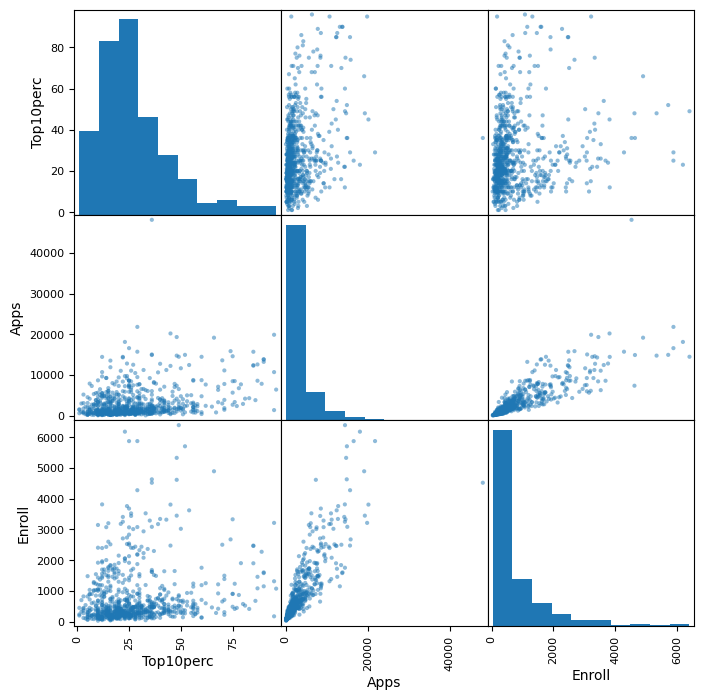

In [5]:
# Scatterplot matrix of Top10perc, Apps, Enroll
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']], alpha=0.5, figsize=(8, 8))


# Use of "pd.plotting." instead of "pandas.plotting." as we imported "pandas" as "pd" before our answer to excercise (a).

**(e) Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private.**

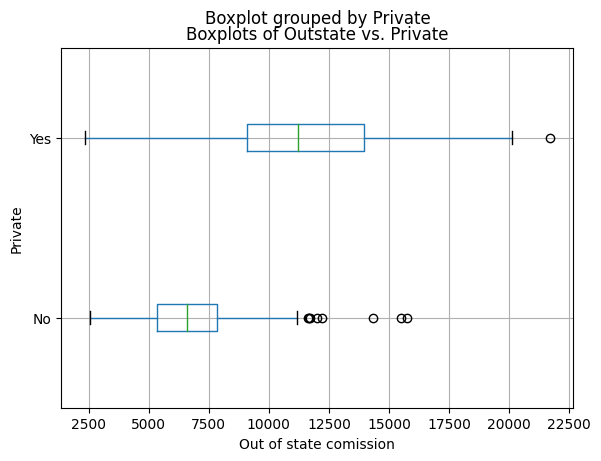

In [6]:
# Import matplotlib
import matplotlib.pyplot as plt

# Creating side-by-side boxplots of 'Outstate' vs. 'Private'
college.boxplot(column='Outstate', by='Private', vert=False)
plt.title('Boxplots of Outstate vs. Private')
plt.xlabel('Out of state comission')
plt.ylabel('Private')
plt.show()

# The column parameter specifies the numeric variable for which we want to create boxplots ('Outstate' in this case).
# The by parameter specifies the categorical variable that determines the groups ('Private' in this case).
# The vert=False parameter specifies that the boxplots should be horizontal.

**(f) Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.**

Elite Counts:
No     699
Yes     78
Name: Elite, dtype: int64


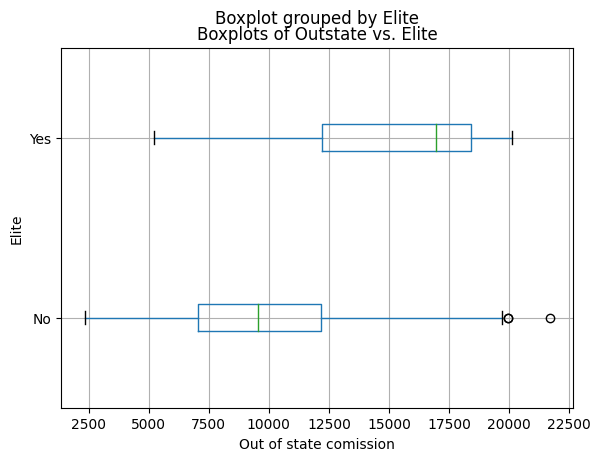

In [7]:
# Create a new variable 'Elite' based on 'Top10perc'
college['Elite'] = pd.cut(college['Top10perc'], [0, 50, 100], labels=['No', 'Yes'])
# The [0, 50, 100] argument defines the bin edges (specific to the range of values in "Top10perc"), and the labels argument 
# specifies the corresponding labels.

# Counting elite universities using value_counts()
elite_counts = college['Elite'].value_counts()
print("Elite Counts:")
print(elite_counts)

# Creating side-by-side boxplots of 'Outstate' versus 'Elite'
college.boxplot(column='Outstate', by='Elite', vert=False)
plt.title('Boxplots of Outstate vs. Elite')
plt.xlabel('Out of state comission')
plt.ylabel('Elite')
plt.show()

**(g) Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.**

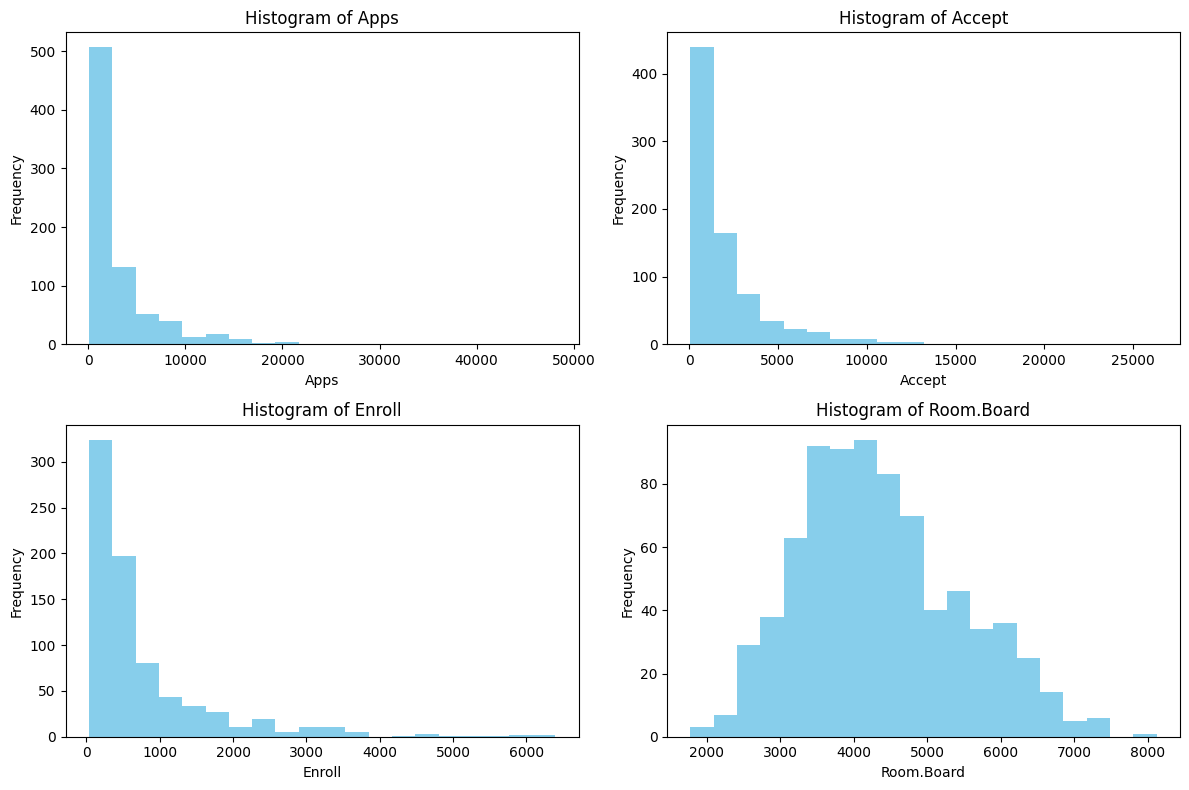

In [8]:
# Selecting a subset of quantitative variables for histograms
quantitative_vars = ['Apps', 'Accept', 'Enroll', 'Room.Board']

# Creating subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating histograms for selected quantitative variables with different numbers of bins
for i, var in enumerate(quantitative_vars):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    ax = axes[row, col]  # Get the current axis
    
    # Create histograms with different numbers of bins
    ax.hist(college[var], bins=20, color='skyblue', alpha=1)
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()


**(h) Continue exploring the data, and provide a brief summary of what you discover.**

In [9]:
# Print summary statistics generated in step (c)

print(summary_stats)

       Private          Apps        Accept       Enroll   Top10perc  \
count      777    777.000000    777.000000   777.000000  777.000000   
unique       2           NaN           NaN          NaN         NaN   
top        Yes           NaN           NaN          NaN         NaN   
freq       565           NaN           NaN          NaN         NaN   
mean       NaN   3001.638353   2018.804376   779.972973   27.558559   
std        NaN   3870.201484   2451.113971   929.176190   17.640364   
min        NaN     81.000000     72.000000    35.000000    1.000000   
25%        NaN    776.000000    604.000000   242.000000   15.000000   
50%        NaN   1558.000000   1110.000000   434.000000   23.000000   
75%        NaN   3624.000000   2424.000000   902.000000   35.000000   
max        NaN  48094.000000  26330.000000  6392.000000   96.000000   

         Top25perc   F.Undergrad   P.Undergrad      Outstate   Room.Board  \
count   777.000000    777.000000    777.000000    777.000000   777.000

In [10]:
# Correlation matrix
correlation_matrix = college.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.39069

C:\Users\Nikit\AppData\Local\Temp\ipykernel_32744\1108710663.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = college.corr()


In [11]:
# Hypothesis test for differences in graduation rates between private and public universities
from scipy import stats

private_grad_rates = college.loc[college['Private'] == 'Yes', 'Grad.Rate']
public_grad_rates = college.loc[college['Private'] == 'No', 'Grad.Rate']

# Perform a t-test to compare means
t_stat, p_value = stats.ttest_ind(private_grad_rates, public_grad_rates)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 9.936633675908949, P-Value: 5.56873026400316e-22


**Summary Stats:**

The summary statistics provide an overview of the dataset's quantitative variables. Some key observations:

There are 777 universities in the dataset, with 565 of them being private.
The mean number of applications received is approximately 3001, with a standard deviation of around 3870.
The mean acceptance rate is about 2018.8, with a standard deviation of around 2451.1.
The mean enrollment of new students is around 779.97, with a standard deviation of about 929.18.
The mean percentage of new students from the top 10% of their high school class is approximately 27.56%.

**Correlation Matrix:**

The correlation matrix helps identify relationships between quantitative variables. Some observations:

* The variables 'Apps,' 'Accept,' and 'Enroll' are highly positively correlated, indicating that universities receiving more applications tend to accept more students and enroll more of them.
* The percentage of new students from the top 10% of their high school class ('Top10perc') and the percentage from the top 25% ('Top25perc') are strongly positively correlated.
* The expenditure per student ('Expend') is positively correlated with variables like 'Apps,' 'PhD,' and 'Terminal,' indicating that higher expenditure is associated with more applications and faculty with Ph.D. degrees.
The student-to-faculty ratio ('S.F.Ratio') is negatively correlated with 'PhD' and 'Terminal,' suggesting that a higher percentage of faculty with Ph.D. degrees is associated with a lower student-to-faculty ratio.

**Hypothesis Test:**

The hypothesis test result shows a significant difference in graduation rates between private and public universities in. The high t-statistic (9.94) and the very low p-value (approximately 5.57e-22) suggest that there is a strong statistical difference in graduation rates between these two types of universities. This means that private universities have a statistically significant higher rate of graduation when compared to public universities.

In summary, the dataset contains information about universities, including their characteristics and variables like application rates, acceptance rates, and expenditure. The correlation matrix highlights relationships between these variables, and the hypothesis test confirms a significant difference in graduation rates between private and public universities. Further exploration and analysis can provide deeper insights into this dataset.

**9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.**

In [1]:
import pandas as pd

# Read Auto data into workbook
auto = pd.read_csv("Auto.csv")

# Show the total number of missing values for each variable
print(auto.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


**(a) Which of the predictors are quantitative, and which are qualitative?**

In [6]:
# Print the data types for the variables in the auto dataframe
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


**Quantitative Predictors:**

mpg, cylinders, displacement, weight, acceleration, year, origin

**Qualitative Predictors:**

horsepower, name

*If we view the data we can see that horsepower appears to be a numeric variable. Let's investigate further:*

In [16]:
# Identify non-numeric values in the "horsepower" column
non_numeric_values = auto[~auto['horsepower'].str.isnumeric()]['horsepower'] #Will only run before the "?" are replaced.
print(non_numeric_values)

32     ?
126    ?
330    ?
336    ?
354    ?
Name: horsepower, dtype: object


In [2]:
# Reload the Auto dataset with "?" as missing values
auto = pd.read_csv('Auto.csv', na_values='?')

# Remove rows with missing values in the "horsepower" column
auto.dropna(subset=['horsepower'], inplace=True)

# Convert the "horsepower" column to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

# Check the data type of the "horsepower" column
print(auto['horsepower'].dtype)

float64


**(b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.**

In [4]:
import numpy as np

# Create a list of quantitative predictors:
quantitative_predictors = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

# Calculate the range for each quantitative predictor
ranges = {}

for predictor in quantitative_predictors:
    min_value = np.min(auto[predictor])
    max_value = np.max(auto[predictor])
    predictor_range = max_value - min_value
    ranges[predictor] = predictor_range

# Print the ranges for each quantitative predictor
for predictor, predictor_range in ranges.items():
    print(f"Range of {predictor}: {predictor_range}")

Range of mpg: 37.6
Range of cylinders: 5
Range of displacement: 387.0
Range of horsepower: 184.0
Range of weight: 3527
Range of acceleration: 16.8
Range of year: 12


**(c) What is the mean and standard deviation of each quantitative predictor?**

In [5]:
# Calculate the mean and standard deviation for each predictor
for predictor in quantitative_predictors:
    predictor_mean = auto[predictor].mean()
    predictor_std = auto[predictor].std()
    print(f"Mean for {predictor}: {predictor_mean}")
    print(f"Standard Deviation for {predictor}: {predictor_std}")

Mean for mpg: 23.445918367346938
Standard Deviation for mpg: 7.8050074865717995
Mean for cylinders: 5.471938775510204
Standard Deviation for cylinders: 1.7057832474527845
Mean for displacement: 194.41198979591837
Standard Deviation for displacement: 104.64400390890466
Mean for horsepower: 104.46938775510205
Standard Deviation for horsepower: 38.49115993282849
Mean for weight: 2977.5841836734694
Standard Deviation for weight: 849.4025600429492
Mean for acceleration: 15.541326530612244
Standard Deviation for acceleration: 2.758864119188082
Mean for year: 75.9795918367347
Standard Deviation for year: 3.6837365435778295


In [7]:
# Alternatively we can use describe() from pandas
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?**

In [18]:
# Remove the 10th through 85th observations
auto_subset = auto.drop(index=range(10, 86), errors='ignore')

# Some of the indexed rows were previously removed when we took out row with missing horsepower values. 
# Adding errors='ignore' prevents the drop() argument from returning key errors.

# Calculate the range, mean, and standard deviation for each predictor in the subset
quantitative_predictors = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

# Calculate and print the range, mean, and standard deviation for each predictor
for predictor in quantitative_predictors:
    predictor_range = auto_subset[predictor].max() - auto_subset[predictor].min()
    predictor_mean = auto_subset[predictor].mean()
    predictor_std = auto_subset[predictor].std()
    print(f"Range for {predictor}: {predictor_range}")
    print(f"Mean for {predictor}: {predictor_mean}")
    print(f"Standard Deviation for {predictor}: {predictor_std}")


Range for mpg: 35.6
Mean for mpg: 24.374763406940065
Standard Deviation for mpg: 7.872564543483587
Range for cylinders: 5
Mean for cylinders: 5.381703470031546
Standard Deviation for cylinders: 1.6581347994229967
Range for displacement: 387.0
Mean for displacement: 187.8801261829653
Standard Deviation for displacement: 100.16997334270233
Range for horsepower: 184.0
Mean for horsepower: 101.0031545741325
Standard Deviation for horsepower: 36.003208227537144
Range for weight: 3348
Mean for weight: 2938.8548895899053
Standard Deviation for weight: 811.640667914713
Range for acceleration: 16.3
Mean for acceleration: 15.704100946372236
Standard Deviation for acceleration: 2.719912896949601
Range for year: 12
Mean for year: 77.1230283911672
Standard Deviation for year: 3.1271584407810797


**(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your fndings.**

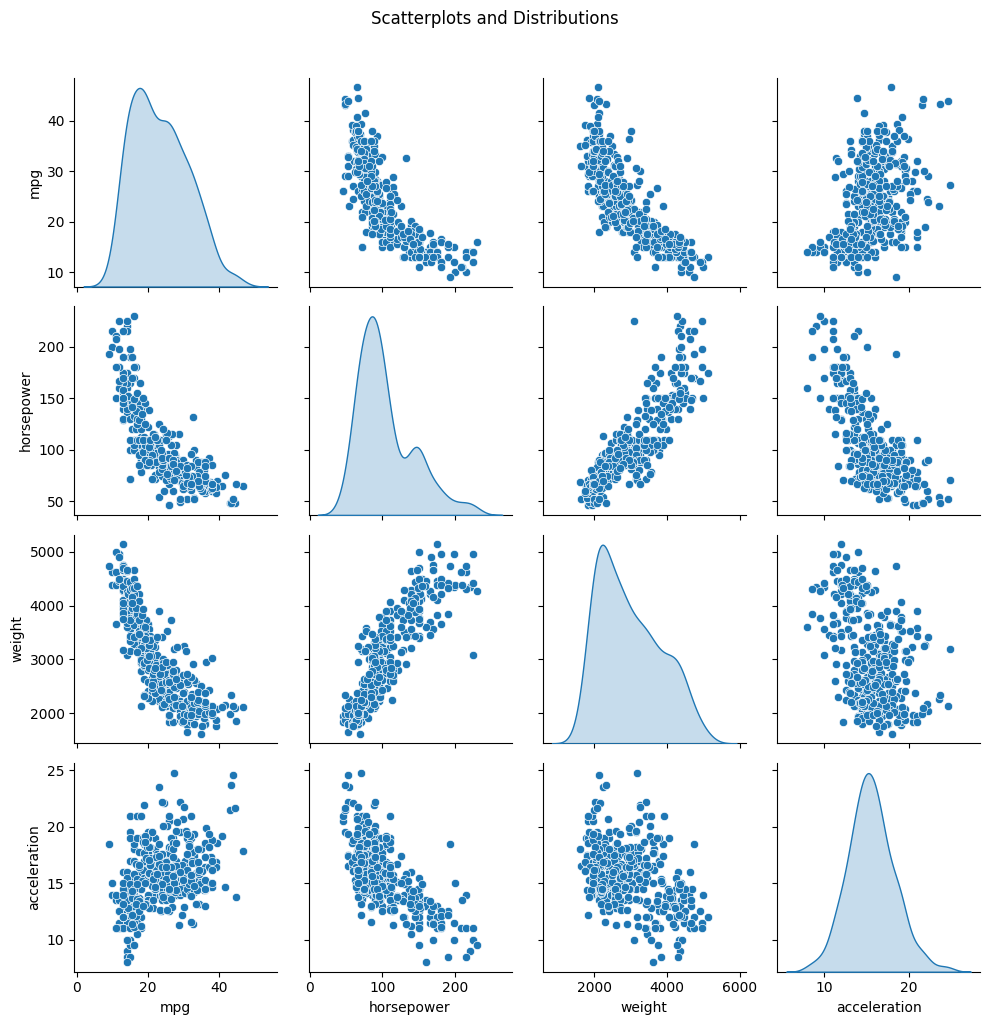

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatterplots
sns.pairplot(auto, vars=['mpg', 'horsepower', 'weight', 'acceleration'], diag_kind='kde')
plt.suptitle("Scatterplots and Distributions", y=1.02)

plt.tight_layout()
plt.show()

* **mpg vs. horsepower:** There appears to be a negative relationship between 'mpg' and 'horsepower.' As 'horsepower' increases, 'mpg' tends to decrease, suggesting that more powerful cars may have lower fuel efficiency.

* **mpg vs. weight:** There seems to be a negative relationship between 'mpg' and 'weight.' Heavier cars tend to have lower 'mpg,' indicating that lighter cars may be more fuel-efficient.

* **mpg vs. acceleration:** The relationship between 'mpg' and 'acceleration' is less clear, with some variation. There is no strong linear pattern.

**(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.**

Based on the scatterplots, 'horsepower' and 'weight' appear to be potentially useful predictors for predicting gas mileage (mpg). These variables exhibit clear relationships with 'mpg' and could be considered in building a predictive model. However, it's essential to perform further analysis, including statistical modeling and feature selection, to determine the precise predictive power of these variables and their impact on gas mileage.

**10. This exercise involves the Boston housing data set.**

**(a) To begin, load in the Boston data set, which is part of the ISLP library.**

In [1]:
from ISLP import load_data

# Load the Boston housing data set
boston = load_data('Boston')

# Extract the feature variables (X) and target variable (y) from the dataset
X = boston.drop(columns=['medv'])  
y = boston['medv']  

**(b) How many rows are in this data set? How many columns? What do the rows and columns represent?**

In [5]:
# Check the shape of the feature variable array (X)
num_rows, num_columns = boston.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 506
Number of columns: 13


A data set containing housing values in 506 suburbs of Boston.

* crim: per capita crime rate by town.
* zn: proportion of residential land zoned for lots over 25,000 sq.ft.
* indus: proportion of non-retail business acres per town.
* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* nox: nitrogen oxides concentration (parts per 10 million).
* rm: average number of rooms per dwelling.
* age: proportion of owner-occupied units built prior to 1940.
* dis: weighted mean of distances to five Boston employment centres.
* rad: index of accessibility to radial highways.
* tax: full-value property-tax rate per $10,000.
* ptratio: pupil-teacher ratio by town.
* lstat: lower status of the population (percent).
* medv: median value of owner-occupied homes in $1000s.

**(c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.**

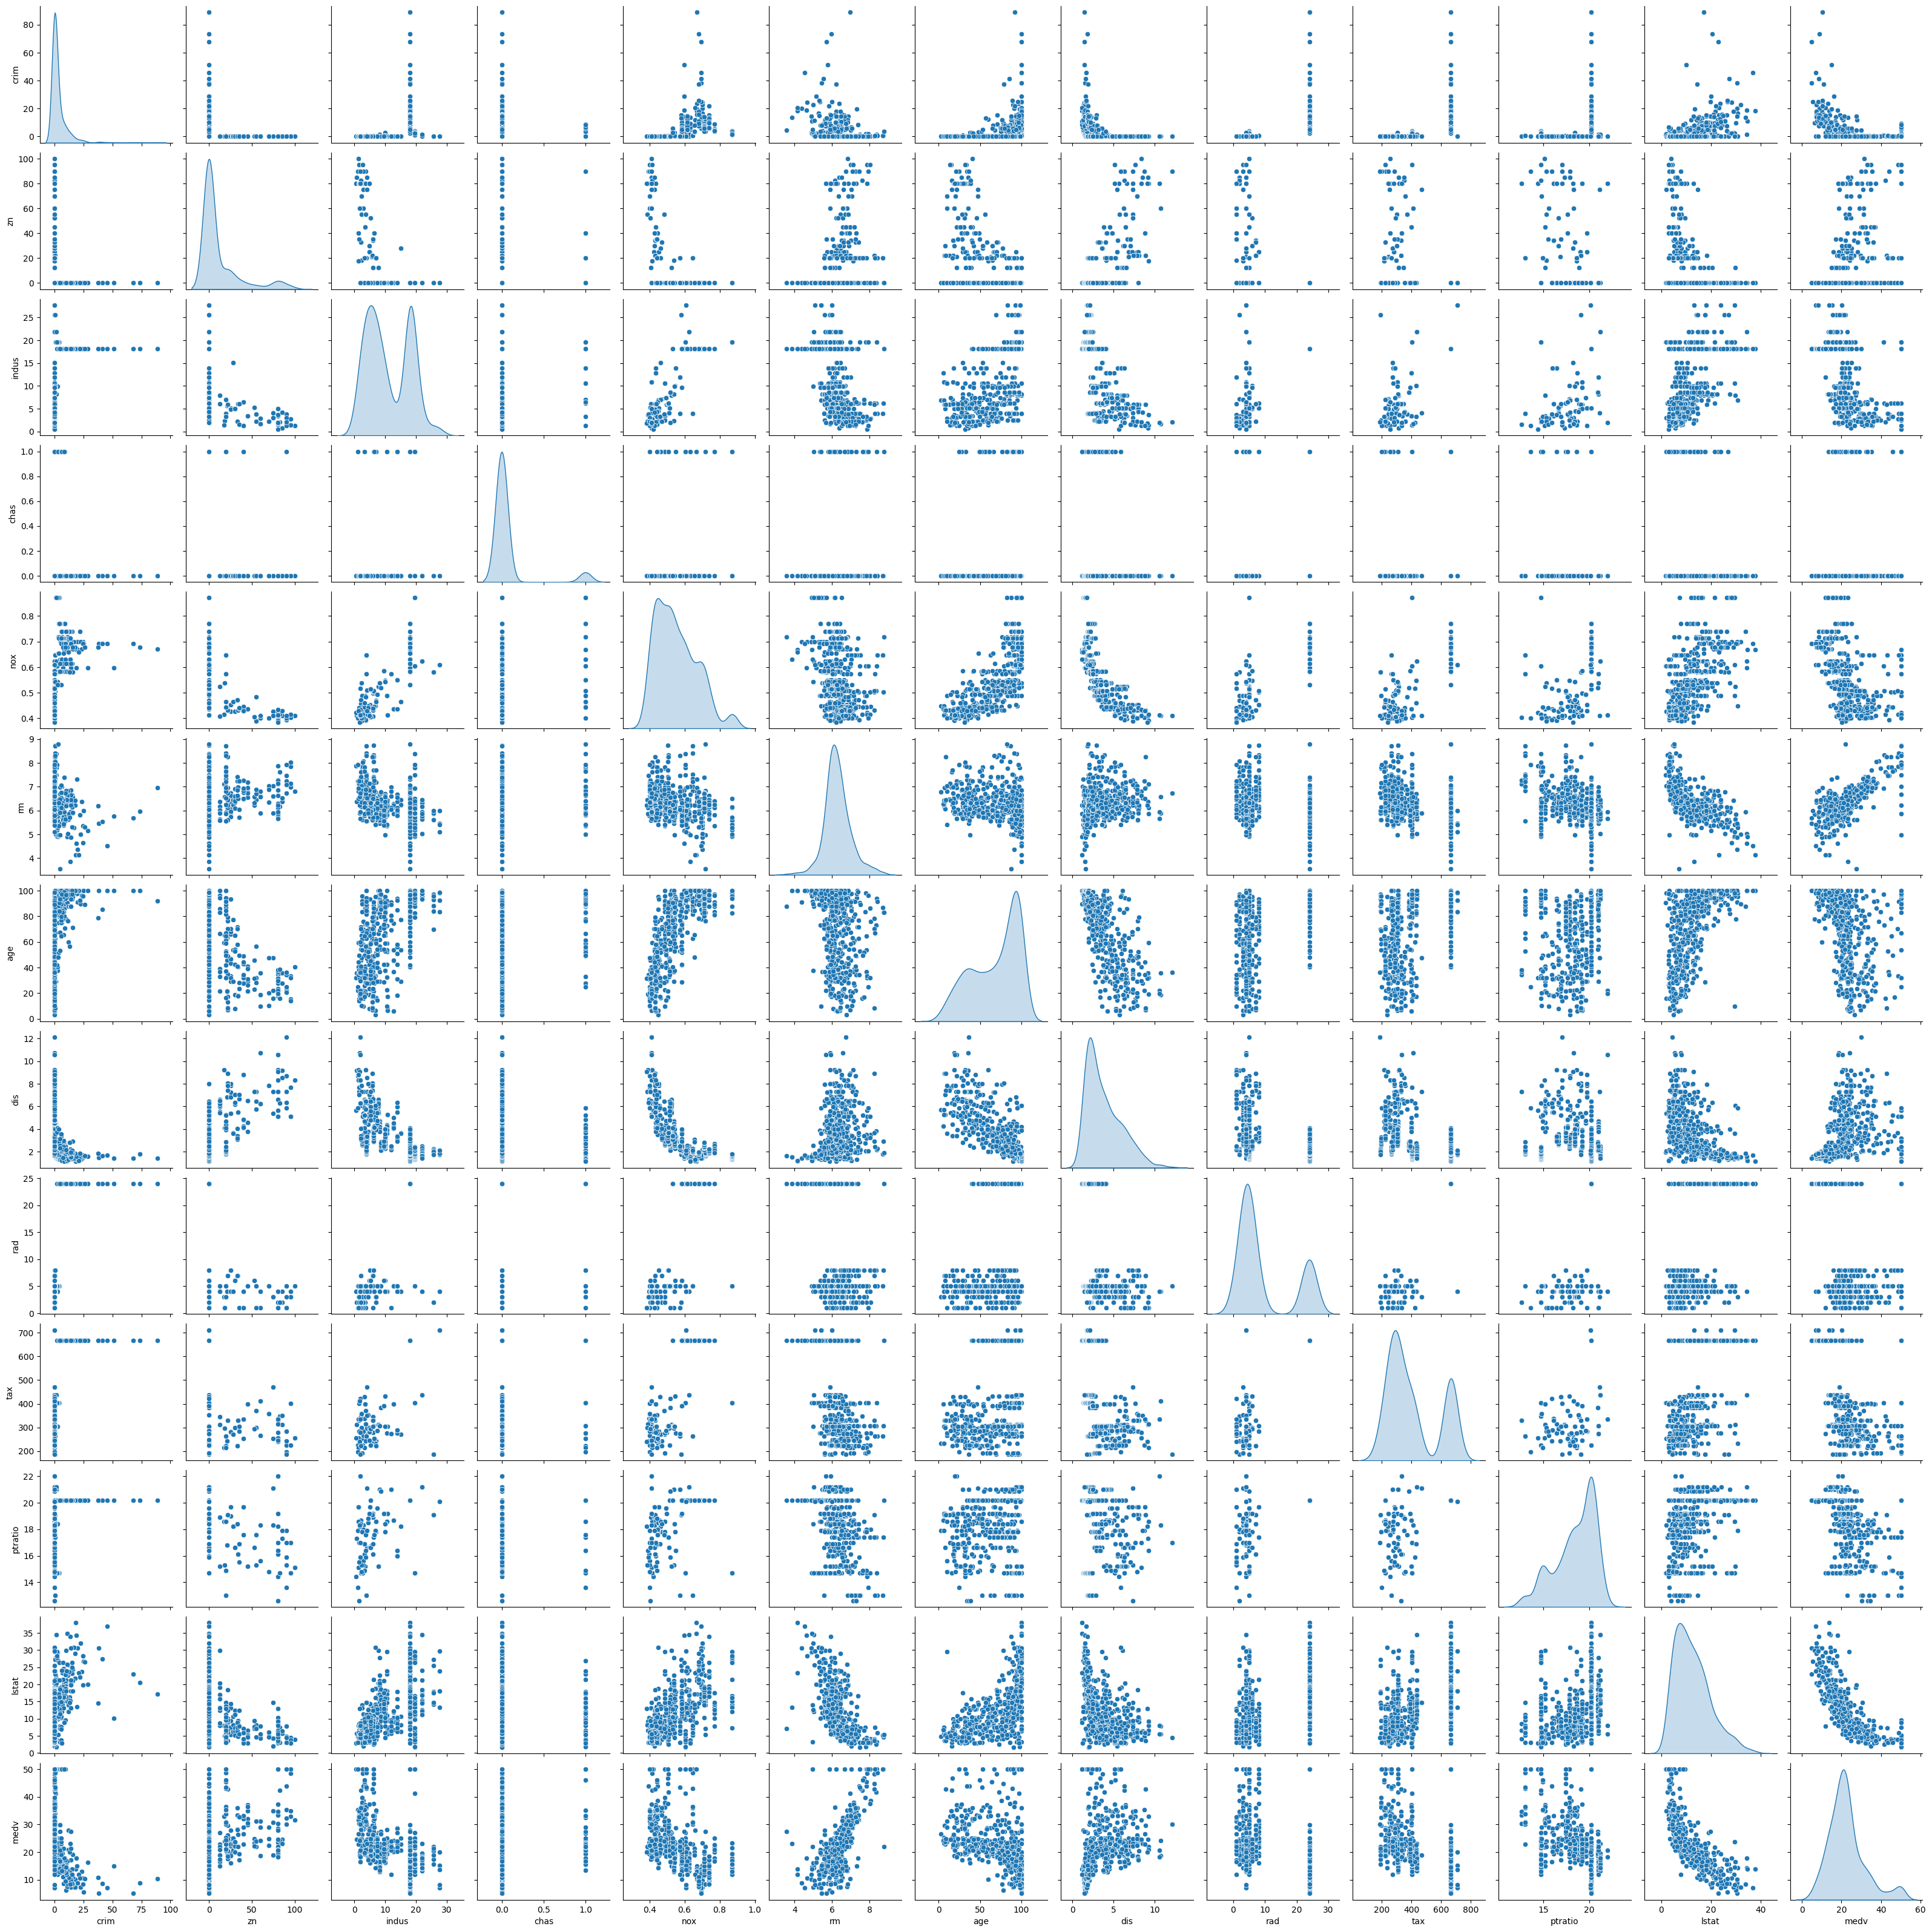

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create pairwise scatterplots of the predictors
sns.pairplot(data=boston, diag_kind='kde')
plt.show()

**Low Interdependence:** Most of the predictor variables do not show significant correlations with each other. This suggests a lack of strong linear relationships among the predictors. For example, variables like "rm" (average number of rooms per dwelling) and "age" (proportion of owner-occupied units built before 1940) do not exhibit clear linear patterns when plotted against each other.

**Normal Distribution:** A few of the variables, such as "crim" (crime rate) and "zn" (proportion of residential land zoned for large lots), appear to be approximately normally distributed. This is evident from the scatterplots where data points cluster around a bell-shaped curve.

**Non-Linear Relationships:** In contrast to linear relationships, most of the relationships between predictors and the target variable "medv" (median value of owner-occupied homes) appear to be non-linear. These non-linear patterns may require non-linear modeling techniques to capture accurately.

**Distinct Clusters:** Many scatterplots reveal the presence of two distinct clusters of data points. This phenomenon is especially noticeable for the "rad" (accessibility to radial highways) variable, which exhibits a clear separation between data points. This bimodal distribution suggests that there might be underlying factors or categories that influence this predictor. Understanding and accounting for these clusters could be important in modeling.

**(d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.**

In [18]:
# Calculate the correlation coefficients
crim_correlations = boston.corr()['crim'].sort_values(ascending=False)
crim_correlations

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64

### Variable relationships with crime rate:

* rad (Accessibility to Radial Highways): Positive correlation (0.626).
* tax (Property Tax Rate): Positive correlation (0.583).
* lstat (Percentage of Lower Status Population): Positive correlation (0.456).
* nox (Nitrogen Oxides Concentration): Positive correlation (0.421).
* indus (Proportion of Non-Retail Business Acres): Positive correlation (0.407).
* age (Proportion of Owner-Occupied Units Built Before 1940): Moderate Positive correlation (0.353).
* ptratio (Pupil-Teacher Ratio): Weak positive correlation (0.290).
* chas (Charles River Dummy Variable): Weak negative correlation (-0.056).
* zn (Proportion of Residential Land Zoned for Large Lots): Weak negative correlation (-0.200).
* rm (Average Number of Rooms per Dwelling): Weak negative correlation (-0.219).
* dis (Weighted Distance to Employment Centers): Moderate negative correlation (-0.380).
* medv (Median Value of Owner-Occupied Homes): Moderate negative correlation (-0.388).

**(e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.**

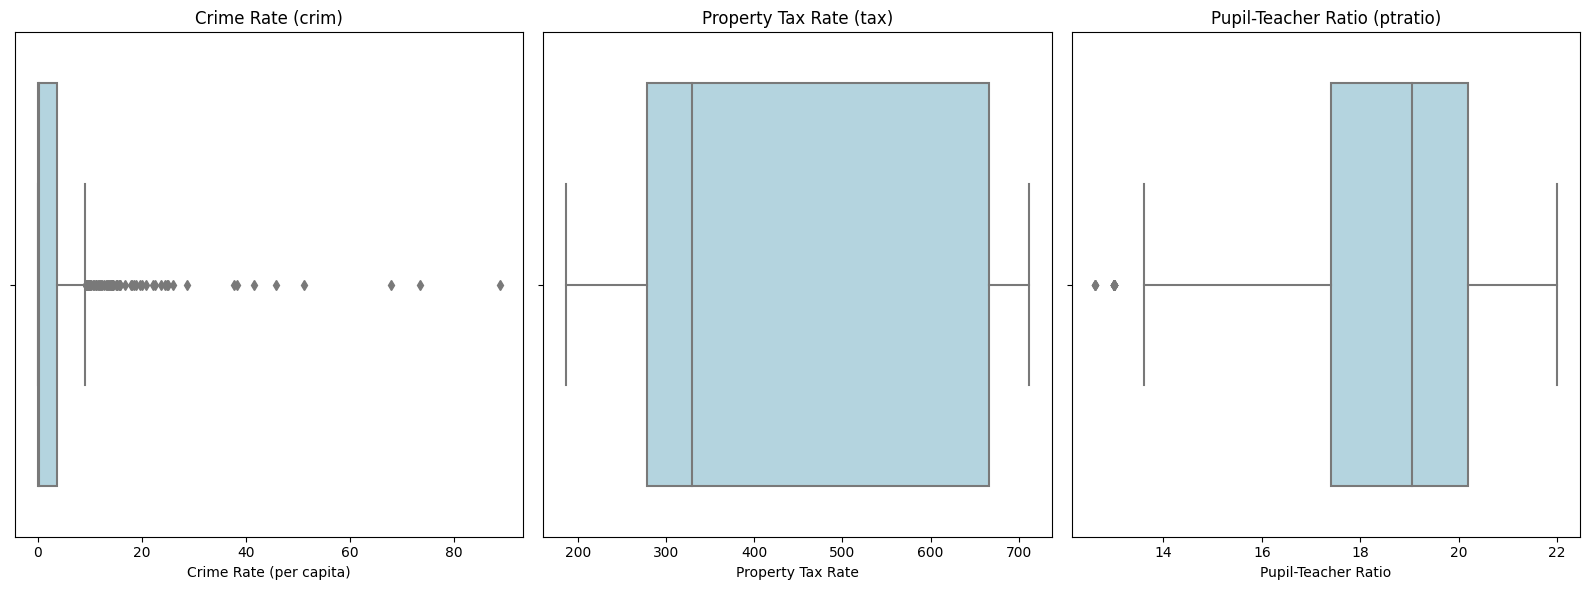

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Set a light blue palette
sns.set_palette("light:blue")

# Box plot for Crime Rate (crim)
sns.boxplot(x=boston['crim'], ax=axes[0], color='lightblue')
axes[0].set_title('Crime Rate (crim)')
axes[0].set_xlabel('Crime Rate (per capita)')
axes[0].set_ylabel('')

# Box plot for Property Tax Rate (tax)
sns.boxplot(x=boston['tax'], ax=axes[1], color='lightblue')
axes[1].set_title('Property Tax Rate (tax)')
axes[1].set_xlabel('Property Tax Rate')
axes[1].set_ylabel('')

# Box plot for Pupil-Teacher Ratio (ptratio)
sns.boxplot(x=boston['ptratio'], ax=axes[2], color='lightblue')
axes[2].set_title('Pupil-Teacher Ratio (ptratio)')
axes[2].set_xlabel('Pupil-Teacher Ratio')
axes[2].set_ylabel('')

# Adjust plot layout
plt.tight_layout()

# Show the plots
plt.show()

In [14]:
import numpy as np

# Calculate the range for crime rates (crim)
min_crim = np.min(boston['crim'])
max_crim = np.max(boston['crim'])

# Calculate the range for property tax rates (tax)
min_tax = np.min(boston['tax'])
max_tax = np.max(boston['tax'])

# Calculate the range for pupil-teacher ratios (ptratio)
min_ptratio = np.min(boston['ptratio'])
max_ptratio = np.max(boston['ptratio'])

# Display the ranges
print(f"Crime Rates (crim) Range: {min_crim} to {max_crim}")
print(f"Property Tax Rates (tax) Range: {min_tax} to {max_tax}")
print(f"Pupil-Teacher Ratios (ptratio) Range: {min_ptratio} to {max_ptratio}")


Crime Rates (crim) Range: 0.00632 to 88.9762
Property Tax Rates (tax) Range: 187 to 711
Pupil-Teacher Ratios (ptratio) Range: 12.6 to 22.0


### Interpetation

**Crime Rates (crim):** The per capita crime rate ranges from 0.00632 to 88.97620. Some suburbs have exceptionally high crime rates, indicating areas with relatively higher crime activity.

**Property Tax Rates (tax):** The property tax rate ranges from 187 to 711. While there's a variation in tax rates, there are suburbs with relatively high tax rates compared to others.

**Pupil-Teacher Ratios (ptratio):** The pupil-teacher ratio ranges from 12.6 to 22.0. Suburbs with higher pupil-teacher ratios indicate a greater number of students per teacher, potentially affecting the quality of education.

**(f) How many of the suburbs in this data set bound the Charles river?**

In [15]:
# Count the number of suburbs that bound the Charles River (chas = 1)
bound_charles_count = np.sum(boston['chas'] == 1)

# Display the count
print(f"Number of suburbs bounding the Charles River: {bound_charles_count}")

Number of suburbs bounding the Charles River: 35


**(g) What is the median pupil-teacher ratio among the towns in this data set?**

In [16]:
import numpy as np

# Calculate the median pupil-teacher ratio
median_ptratio = np.median(boston['ptratio'])

# Display the median pupil-teacher ratio
print(f"Median pupil-teacher ratio among the towns: {median_ptratio}")

Median pupil-teacher ratio among the towns: 19.05


**(h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.**

In [17]:
# Find the index of the suburb with the lowest median value of owner-occupied homes
lowest_medv_index = boston['medv'].idxmin()

# Extract the data for that suburb
lowest_medv_suburb = boston.loc[lowest_medv_index]

# Display the values of all predictors for the suburb
print("Values of predictors for the suburb with the lowest median value of owner-occupied homes:")
print(lowest_medv_suburb)

# Find the overall ranges for those predictors
overall_ranges = boston.describe().loc[['min', 'max']]

# Display the overall ranges for those predictors
print("\nOverall ranges for predictors:")
print(overall_ranges)

Values of predictors for the suburb with the lowest median value of owner-occupied homes:
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

Overall ranges for predictors:
         crim     zn  indus  chas    nox     rm    age      dis   rad    tax  \
min   0.00632    0.0   0.46   0.0  0.385  3.561    2.9   1.1296   1.0  187.0   
max  88.97620  100.0  27.74   1.0  0.871  8.780  100.0  12.1265  24.0  711.0   

     ptratio  lstat  medv  
min     12.6   1.73   5.0  
max     22.0  37.97  50.0  


### Interpretation

**crim (Crime Rate):** Suburb 398 has a significantly higher crime rate (38.3518) compared to the overall range of crime rates in the dataset.

**zn (Proportion of Residential Land):** It has no residential land, indicating that it is primarily non-residential, which is an outlier compared to suburbs with some residential land.

**indus (Proportion of Industrial Land):** This suburb has a high proportion of industrial land (18.1), surpassing the maximum value in the dataset.

**chas (Charles River Proximity):** It is not located along the Charles River, similar to many other suburbs in the dataset.

**nox (Nitrogen Oxide Concentration):** The nitrogen oxide concentration in suburb 398 (0.6930) is towards the higher end of the range seen in the dataset.

**rm (Average Number of Rooms):** The average number of rooms in houses in this suburb (5.4530) is notably lower compared to the dataset's overall range.

**age (Proportion of Old Buildings):** All buildings in suburb 398 are old (100%), indicating a lack of newer constructions compared to other suburbs.

**dis (Distance to Employment Centers):** The distance to employment centers in this suburb (1.4896) is relatively short but within the overall range.

**rad (Accessibility to Highways):** Suburb 398 has a high accessibility rating (rad=24) to highways, which is at the upper end of the range.

**tax (Property Tax Rate):** The property tax rate (tax=666) in this suburb is among the highest in the dataset.

**ptratio (Pupil-Teacher Ratio):** The pupil-teacher ratio (ptratio=20.2) is on the higher side compared to other suburbs.

**lstat (Lower Income Population):** Suburb 398 has a relatively high percentage of lower-income population (lstat=30.59).

**medv (Median Home Value):** Finally, the median home value in suburb 398 is the lowest in the dataset (medv=5.0), suggesting that it might be an economically challenged area.

**(i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.**

In [3]:
# Suburbs with more than seven rooms per dwelling
more_than_seven_rooms = boston[boston['rm'] > 7]
num_more_than_seven_rooms = len(more_than_seven_rooms)

# Suburbs with more than eight rooms per dwelling
more_than_eight_rooms = boston[boston['rm'] > 8]
num_more_than_eight_rooms = len(more_than_eight_rooms)

# Print the number of suburbs with more then 7 and then with more then 8 rooms per dwelling on average.
num_more_than_seven_rooms, num_more_than_eight_rooms

# Descriptive statistics for suburbs with more than eight rooms per dwelling
more_than_eight_rooms.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000


### Interpretation of more_than_eight_rooms dataframe:

* The crime rate (crim) in these suburbs is generally lower than the overall range, indicating lower crime rates in these areas.
* The proportion of residential land zoned for large lots (zn) is notably higher in these suburbs.
* The percentage of non-retail business acres (indus) is lower in these suburbs.
* Most suburbs in this category do not bound the Charles River (chas).
* The levels of nitric oxide concentration (nox) are within the overall range but slightly lower on average.
* The average number of rooms per dwelling (rm) is significantly higher in these suburbs, as expected.
* The age of the housing units (age) varies but tends to be higher on average.
* The weighted distance to employment centers (dis) varies but is generally within the overall range.
* The index of accessibility to radial highways (rad) also varies but is within the overall range.
* The property tax rate (tax) and pupil-teacher ratio (ptratio) show some variation but are within the overall range.
* The percentage of lower-status population (lstat) is lower on average in these suburbs.
* The median value of owner-occupied homes (medv) varies but is within the overall range.